<a href="https://colab.research.google.com/github/iotanalytics/IoTTutorial/blob/main/code/preprocessing_and_decomposition/Signal_Filters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Signal Filters


##Introduction
In signal processing, a digital filter is a system that performs mathematical operations on a sampled, discrete-time signal to reduce or enhance certain aspects of that signal. This is in contrast to the other major type of electronic filter, the analog filter, which is typically an electronic circuit operating on continuous-time analog signals.

In real practice, low-pass, band-pass, band-stop and high-pass filters are commonly design and used.

Types of Filters:

A linear filter is a linear transformation of input samples; other filters are nonlinear. Linear filters satisfy the superposition principle, i.e. if an input is a weighted linear combination of different signals, the output is a similarly weighted linear combination of the corresponding output signals.

A causal filter uses only previous samples of the input or output signals; while a non-causal filter uses future input samples. A non-causal filter can usually be changed into a causal filter by adding a delay to it.

A time-invariant filter has constant properties over time; other filters such as adaptive filters change in time.

A stable filter produces an output that converges to a constant value with time, or remains bounded within a finite interval. An unstable filter can produce an output that grows without bounds, with bounded or even zero input.

A finite impulse response (FIR) filter uses only the input signals, while an infinite impulse response (IIR) filter uses both the input signal and previous samples of the output signal. FIR filters are always stable, while IIR filters may be unstable.

see: 

https://docs.scipy.org/doc/scipy/reference/signal.html

https://www.dsprelated.com/freebooks/filters/ 

In [2]:
import numpy as np
from scipy import signal
from scipy.signal import butter, lfilter
from numpy import array
import matplotlib.pyplot as plt
import pandas as pd


In [3]:
## example data importing
data = pd.read_csv('https://raw.githubusercontent.com/iotanalytics/IoTTutorial/main/data/SCG_data.csv').drop('Unnamed: 0',1).to_numpy()[0:20,:1000]

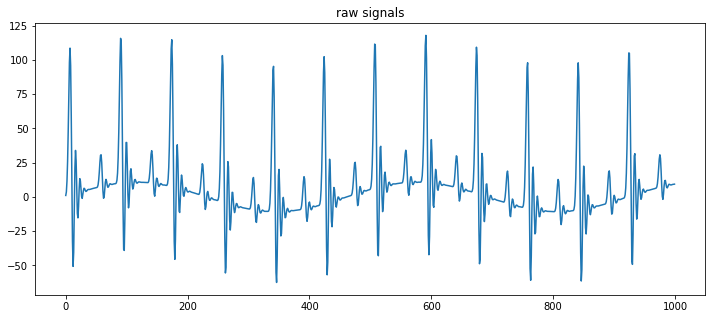

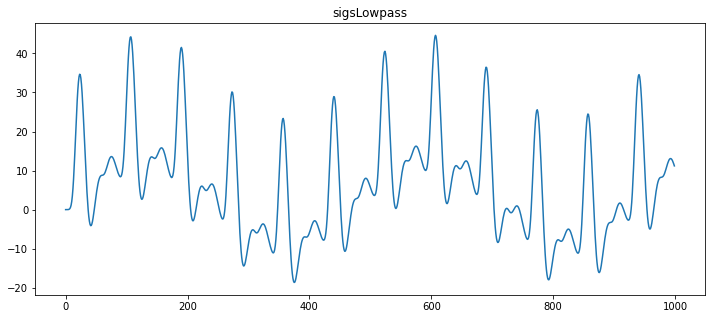

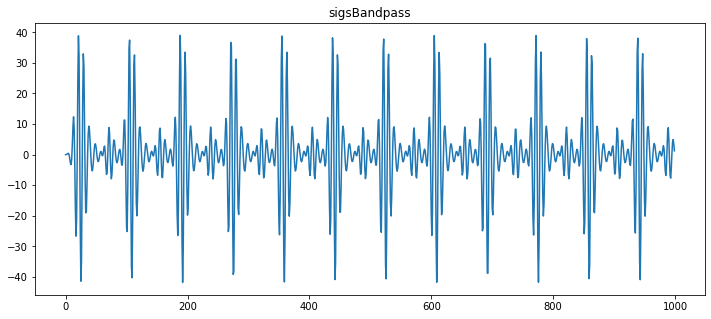

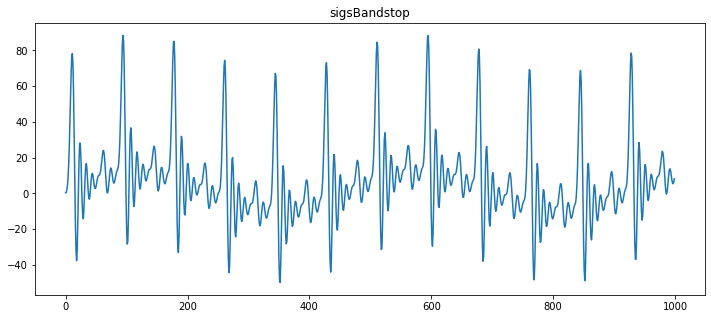

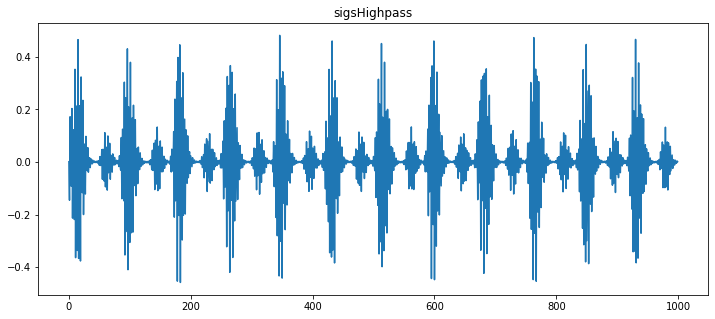

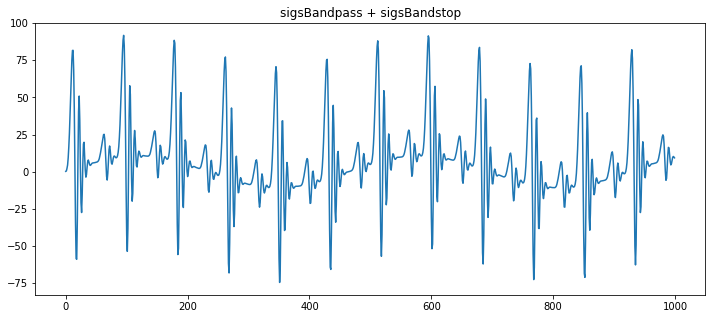

In [6]:

def butter_bandpass(lowcut, highcut, fs, order):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a


def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

def butter_bandstop_filter(data, lowcut, highcut, fs, order=5):
        nyq = 0.5 * fs
        low = lowcut / nyq
        high = highcut / nyq

        i, u = butter(order, [low, high], btype='bandstop')
        y = lfilter(i, u, data)
        return y

def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y

def butter_highpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = signal.butter(order, normal_cutoff, btype='high', analog=False)
    return b, a

def butter_highpass_filter(data, cutoff, fs, order=5):
    b, a = butter_highpass(cutoff, fs, order=order)
    y = signal.filtfilt(b, a, data)
    return y


def sine_generator(fs, sinefreq, duration):
    T = duration
    nsamples = fs * T
    w = 2. * np.pi * sinefreq
    t_sine = np.linspace(0, T, nsamples, endpoint=False)
    y_sine = np.sin(w * t_sine)
    result = pd.DataFrame({ 
        'data' : y_sine} ,index=t_sine)
    return result




sigs = data[10,:]
sigsLowpass = butter_lowpass_filter(sigs, 1, fs, order=5)
sigsBandpass = butter_bandpass_filter(sigs, 3, 7, fs, order=5)
sigsBandstop = butter_bandstop_filter(sigs, 3, 7, fs, order=5)
sigsHighpass = butter_highpass_filter(sigs, 10, fs, order=5)
sigsRecover = sigsBandpass + sigsBandstop



plt.figure(figsize=(12,5))
plt.title('raw signals')
plt.plot(sigs)
plt.show()

plt.figure(figsize=(12,5))
plt.title('sigsLowpass')
plt.plot(sigsLowpass)
plt.show()

plt.figure(figsize=(12,5))
plt.title('sigsBandpass')
plt.plot(sigsBandpass)
plt.show()

plt.figure(figsize=(12,5))
plt.title('sigsBandstop')
plt.plot(sigsBandstop)
plt.show()

plt.figure(figsize=(12,5))
plt.title('sigsHighpass')
plt.plot(sigsHighpass)
plt.show()

plt.figure(figsize=(12,5))
plt.title('sigsBandpass + sigsBandstop')
plt.plot(sigsRecover)
plt.show()


## Discussion

Pros:

Signal filter provides informatic results.

Easy implementation.

Good mathmatical explaination.

Computational cheap.

Cons:

Frequency cut parameter need to be heuristically determined.



